In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

# 1. 정규화 전 모델

In [2]:
# R로 Box-Cox Transformation 결과 람다는 2 나옴
df= pd.read_csv('happy_0814.csv', header=0)
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)

In [3]:
ndf.head()

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS


In [4]:
model = ols("np.square(HS)~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=ndf)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:08:57   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -73.8005      8.353     -8.835      0.000     -90.184     -57.417
C(country)[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
C(country)[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
C(country)[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
C(country)[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
C(country)[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
C(country)[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
C(country)[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
C(country)[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
C(country)[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
C(country)[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
C(country)[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
C(country)[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
C(country)[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
C(country)[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
C(country)[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
C(country)[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
C(country)[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
C(country)[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
C(country)[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
C(country)[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
C(country)[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
C(country)[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
C(country)[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
C(country)[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
C(country)[T.Canada]                       5.7194      3.829      1.494      0.135     

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,C(country)[T.Albania],6.900927
1,C(country)[T.Algeria],3.742389
2,C(country)[T.Angola],2.323179
3,C(country)[T.Argentina],9.894931
4,C(country)[T.Armenia],8.632705
...,...,...
159,alcohol,47.405497
160,suicide,46.980688
161,obesity,123.652020
162,birth,92.893053


# 2. MinMaxScaler 사용한 모델
## -- MinMaxScaler은 feature 값이 0~1 사이
## -- 변환된 값이 매우 좁은 범위로 압축될 수 있음
## -- 아웃라이어의 존재에 매우 민감

In [6]:
# 싸이킷런 MinMaxScaler 으로 정규화
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale_mm = transformer.fit_transform(x)
df_minmax= pd.DataFrame(scale_mm)
df_minmax.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_minmax에 추가
df_minmax[['HS','year','country','continent']]= ndf[['HS','year','country','continent']]
df_minmax.head()

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,AS


In [7]:
model_mm = ols("np.square(HS)~  country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_minmax)
res_mm = model_mm.fit()
res_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:09:54   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.8209      4.002      0.955      0.340      -4.029      11.671
country[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
country[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
country[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
country[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
country[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
country[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
country[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
country[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
country[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
country[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
country[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
country[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
country[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
country[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
country[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
country[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
country[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
country[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
country[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
country[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
country[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
country[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
country[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
country[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
country[T.Canada]                       5.7194      3.829      1.494      0.135      -1.790      13.229
country[T.Central African Republic]     3.5628      2.243      1.58

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_mm.exog, i)} 
             for i, column in enumerate(model_mm.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,country[T.Albania],6.900927
1,country[T.Algeria],3.742389
2,country[T.Angola],2.323179
3,country[T.Argentina],9.894931
4,country[T.Armenia],8.632705
...,...,...
159,alcohol,47.405497
160,suicide,46.980688
161,obesity,123.652020
162,birth,92.893053


# 3. StandardScaler 사용한 모델
## -- StandardScaler은 각  feature 마다 평균을 0, 분산을 1로 스케일링
## -- 하한값과 상한값이 컬럼마다 다름
## -- 알코올 컬럼같은 경우 range(-7, 6)

In [10]:
# 싸이킷런 StandardScaler으로 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale_ss = scaler.fit_transform(x)
df_standard= pd.DataFrame(scale_ss)
df_standard.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_scaler에 추가
df_standard[['HS','year','country','continent']]= ndf[['HS','year','country','continent']]

In [11]:
model_ss = ols("np.square(HS)~  country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_standard)
res_ss = model_ss.fit()
res_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:10:58   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              31.7548      2.322     13.678      0.000      27.201      36.308
country[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
country[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
country[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
country[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
country[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
country[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
country[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
country[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
country[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
country[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
country[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
country[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
country[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
country[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
country[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
country[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
country[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
country[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
country[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
country[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
country[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
country[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
country[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
country[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
country[T.Canada]                       5.7194      3.829      1.494      0.135      -1.790      13.229
country[T.Central African Republic]     3.5628      2.243      1.58

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_ss.exog, i)} 
             for i, column in enumerate(model_ss.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,country[T.Albania],6.900927
1,country[T.Algeria],3.742389
2,country[T.Angola],2.323179
3,country[T.Argentina],9.894931
4,country[T.Armenia],8.632705
...,...,...
159,alcohol,47.405497
160,suicide,46.980688
161,obesity,123.652020
162,birth,92.893053


# 4. 대안: 카테고리 컬럼을 country -> continent로 변경

In [13]:
model_continent = ols("HS~  C(continent)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=ndf)
res_continent = model_continent.fit()
res_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:11:24   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.5448      0.355     -9.985      0.000      -4.241      -2.849
C(continent)[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
C(continent)[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
C(continent)[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
C(continent)[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
C(continent)[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                   0.5474      0.028     19.341      0.000       0.492       0.603
social                    1.6353      0.152     10.731      0.000       1.336       1.934
life_exp                  0.0243      0.005      5.361      0.000       0.015       0.033
freedom                   0.9182      0.109      8.428      0.000       0.705       1.132
generosity                0.5727      0.087      6.580      0.000       0.402       0.743
corruption               -0.4438      0.083     -5.370      0.000      -0.606      -0.282
schooling                 0.0020      0.008      0.258      0.797      -0.013       0.017
alcohol                   0.0187      0.004      4.536      0.000       0.011       0.027
suicide                  -0.0681      0.020     -3.380      0.001      -0.108      -0.029
obesity                  -0.0223      0.004     -6.083      0.000      -0.030      -0.015
birth                     0.1627      0.020      8.023      0.000       0.123       0.202
mental                    0.0354      0.013      2.786      0.005       0.010       0.060
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_continent.exog, i)} 
             for i, column in enumerate(model_continent.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,C(continent)[T.AS],3.344352
1,C(continent)[T.EU],5.935128
2,C(continent)[T.Nor.A],2.330811
3,C(continent)[T.OC],1.449380
4,C(continent)[T.SA],2.030056
5,log_gdp,7.940896
6,social,2.453185
7,life_exp,8.540061
8,freedom,1.795310
9,generosity,1.514578


# 4.1 continent 범주형 모델로 MinMaxScaler 사용

In [15]:
model_continent_mm = ols("HS~ continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_minmax)
res_continent_mm = model_continent_mm.fit()
res_continent_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:11:50   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5449      0.175      8.850      0.000       1.203       1.887
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                2.7442      0.142     19.341      0.000       2.466       3.022
social                 1.1398      0.106     10.731      0.000       0.932       1.348
life_exp               1.0882      0.203      5.361      0.000       0.690       1.486
freedom                0.6675      0.079      8.428      0.000       0.512       0.823
generosity             0.5916      0.090      6.580      0.000       0.415       0.768
corruption            -0.4208      0.078     -5.370      0.000      -0.574      -0.267
schooling              0.0252      0.098      0.258      0.797      -0.167       0.217
alcohol                0.4923      0.109      4.536      0.000       0.279       0.705
suicide               -0.4344      0.129     -3.380      0.001      -0.686      -0.182
obesity               -0.5536      0.091     -6.083      0.000      -0.732      -0.375
birth                  1.0637      0.133      8.023      0.000       0.804       1.324
mental                 0.3957      0.142      2.786      0.005       0.117       0.674
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_continent_mm.exog, i)} 
             for i, column in enumerate(model_continent_mm.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,continent[T.AS],3.344352
1,continent[T.EU],5.935128
2,continent[T.Nor.A],2.330811
3,continent[T.OC],1.449380
4,continent[T.SA],2.030056
5,log_gdp,7.940896
6,social,2.453185
7,life_exp,8.540061
8,freedom,1.795310
9,generosity,1.514578


# 4.2 continent 범주형 모델로 StandardScaler 사용

In [17]:
model_continent_ss = ols("HS~ continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_standard)
res_continent_ss = model_continent_ss.fit()
res_continent_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:12:11   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1982      0.039    133.270      0.000       5.122       5.275
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                0.6272      0.032     19.341      0.000       0.564       0.691
social                 0.1934      0.018     10.731      0.000       0.158       0.229
life_exp               0.1803      0.034      5.361      0.000       0.114       0.246
freedom                0.1300      0.015      8.428      0.000       0.100       0.160
generosity             0.0932      0.014      6.580      0.000       0.065       0.121
corruption            -0.0833      0.016     -5.370      0.000      -0.114      -0.053
schooling              0.0063      0.024      0.258      0.797      -0.041       0.054
alcohol                0.0722      0.016      4.536      0.000       0.041       0.103
suicide               -0.0522      0.015     -3.380      0.001      -0.083      -0.022
obesity               -0.1126      0.019     -6.083      0.000      -0.149      -0.076
birth                  0.2228      0.028      8.023      0.000       0.168       0.277
mental                 0.0786      0.028      2.786      0.005       0.023       0.134
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_continent_ss.exog, i)} 
             for i, column in enumerate(model_continent_ss.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,continent[T.AS],3.344352
1,continent[T.EU],5.935128
2,continent[T.Nor.A],2.330811
3,continent[T.OC],1.449380
4,continent[T.SA],2.030056
5,log_gdp,7.940896
6,social,2.453185
7,life_exp,8.540061
8,freedom,1.795310
9,generosity,1.514578


# 4.3 회귀분석 전제조건 확인 (standard 모델 기준)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


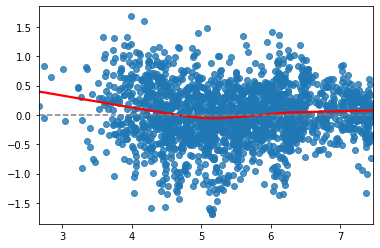

In [20]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= res_continent_ss.predict(df_standard)
residual= df_standard['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')

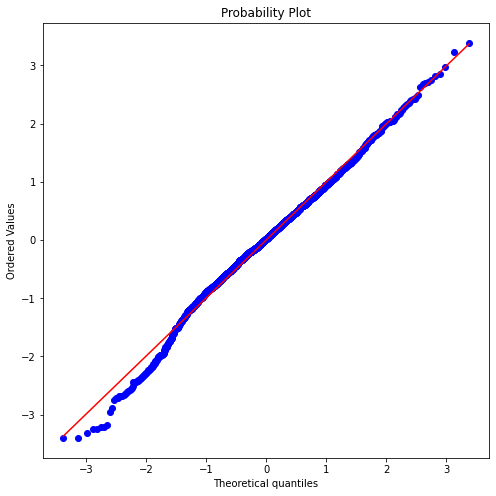

In [21]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [22]:
scipy.stats.shapiro(residual)

(0.993477463722229, 2.2001600541443622e-07)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

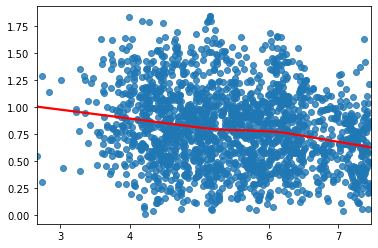

In [23]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

# 4.4 schooling 컬럼 삭제시 결과

In [24]:
# R에서 box-cox 실행시 람다:1.36 -> 반올림 1로 기존 모델 유지
# 변수선택법 사용시 모든 방법(forward, backward, stepwise)에서 schooling 컬럼 제거하라고 나옴
model_continent_sh = ols("HS~ continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption + alcohol+ suicide+ obesity+ birth+ mental", data=ndf)
res_continent_sh = model_continent_sh.fit()
res_continent_sh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     478.4
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:21:21   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2739.
Df Residuals:                    1864   BIC:                             2834.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5711      0.340    -10.504      0.000      -4.238      -2.904
continent[T.AS]        0.1688      0.046      3.701      0.000       0.079       0.258
continent[T.EU]        0.3503      0.062      5.629      0.000       0.228       0.472
continent[T.Nor.A]     0.7693      0.061     12.535      0.000       0.649       0.890
continent[T.OC]        0.5191      0.113      4.587      0.000       0.297       0.741
continent[T.SA]        0.7181      0.061     11.761      0.000       0.598       0.838
log_gdp                0.5499      0.027     20.654      0.000       0.498       0.602
social                 1.6394      0.152     10.820      0.000       1.342       1.937
life_exp               0.0246      0.004      5.623      0.000       0.016       0.033
freedom                0.9188      0.109      8.439      0.000       0.705       1.132
generosity             0.5734      0.087      6.593      0.000       0.403       0.744
corruption            -0.4456      0.082     -5.410      0.000      -0.607      -0.284
alcohol                0.0187      0.004      4.556      0.000       0.011       0.027
suicide               -0.0675      0.020     -3.372      0.001      -0.107      -0.028
obesity               -0.0221      0.004     -6.202      0.000      -0.029      -0.015
birth                  0.1625      0.020      8.021      0.000       0.123       0.202
mental                 0.0344      0.012      2.847      0.004       0.011       0.058
==============================================================================
Omnibus:                       28.628   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.826
Skew:                          -0.222   Prob(JB):                     2.74e-08
Kurtosis:                       3.497   Cond. No.                     1.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model_continent_sh.exog, i)} 
             for i, column in enumerate(model_continent_sh.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,continent[T.AS],3.317140
1,continent[T.EU],5.859425
2,continent[T.Nor.A],2.327118
3,continent[T.OC],1.419027
4,continent[T.SA],2.029305
5,log_gdp,7.029978
6,social,2.426550
7,life_exp,7.961296
8,freedom,1.794356
9,generosity,1.513120


C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


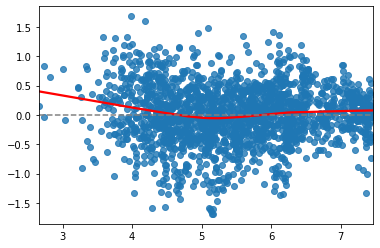

In [26]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= res_continent_sh.predict(ndf)
residual= ndf['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')

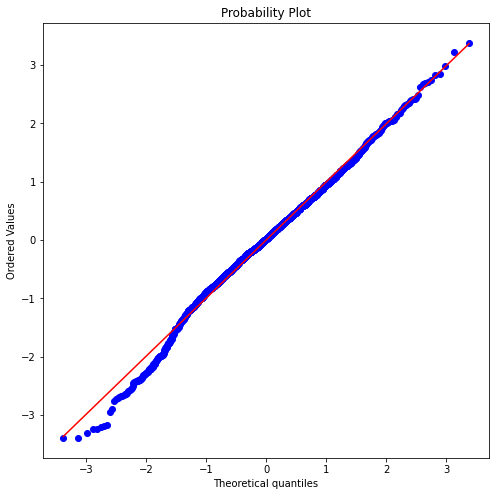

In [27]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [28]:
scipy.stats.shapiro(residual)

(0.9934487342834473, 2.0753000740114658e-07)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

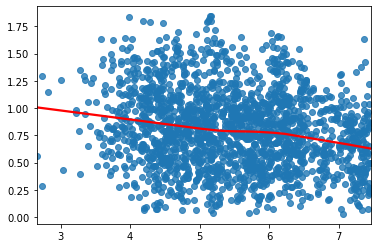

In [29]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})